In [153]:
from fasta_iterator_class import FASTAReader
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as scipy
import numpy as np

In [155]:
new = open('new.fa', 'w')

for (seq_id1, seq1), (sed_id2, seq2) in zip(FASTAReader(open('/Users/cmdb/qbb2020-answers/week4/alignment.fa')), FASTAReader(open('/Users/cmdb/qbb2020-answers/week4/query_and_blast.fa'))):
    new.write(seq_id1 + '\n')
    new_DNA = ''
    j = 0
    for i, aa in enumerate(seq1):
        if aa == '-':
            new_DNA += '---'
        else:
            new_DNA += seq2[j:(j+3)]
            j += 3
            if i == len(seq1):
                break       
    new.write(new_DNA + '\n')

new.close()    

In [89]:
sequences = open('new.fa', 'r')
test_seq = []
counter = 0
for line in sequences:
    line = line.rstrip('\n')
    if '_' in line:
        continue
    else: 
        test_seq.append(line)
query = test_seq.pop(0)


In [90]:
q_c = []
codon = ''
counter = 0
for nuc in query:
    codon = codon + nuc
    counter +=1
    if counter%3 == 0:
        q_c.append(codon)
        codon = ''
#print(q_c)

In [33]:
#print(q_c)

In [8]:
codontable = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}

In [91]:
t_c = []
codon2 = ''
counter2 = 0
for seq in test_seq:
    new_seq = []
    for nuc2 in seq:
        codon2 = codon2 + nuc2
        counter2+=1
        if counter2%3 == 0:
            new_seq.append(codon2)
            codon2 = ''
    t_c.append(new_seq)
#print(type(t_c)) 
#print(t_c[0])
#print(t_c[1])

In [94]:
#need to figure out why some are only 7136 but will do this for now
for seq in t_c:
    if len(seq) != 7137:
        seq.append('---')

In [127]:
codon_l = []
dS_l= []
dN_l =[]
df= pd.DataFrame(columns=['Codon', 'dS', 'dN'])
for i, cod in enumerate(q_c):
    dS= 0
    dN= 0
    for seq in t_c:
        alt = seq[i]
        ref = q_c[i]
        if alt == '---' or ref == '---':
            continue
        elif alt != ref:
            if alt not in codontable.keys():
                continue
            if codontable[alt] == codontable[ref]:
                dS +=1
            else:
                dN +=1
        else:
            continue
    
    if dS == 0 or dN == 0:
        continue
    else:
        codon_l.append(i)
        dS_l.append(dS)
        dN_l.append(dN)
  

In [179]:
df['Codon'] = codon_l
df['dS'] = dS_l
df['dN'] = dN_l
#df

In [177]:
df['dN/dS'] = df['dN']/df['dS']
#df

In [168]:
D = df['dN']-df['dS']
df['D'] = D

In [169]:
z = scipy.zscore(D)
df['z'] = z

In [178]:
p = scipy.norm.sf(abs(z))
df['p'] = p
#df

In [172]:
dNdS = df.iloc[:, 3]

In [173]:
log = np.log2(dNdS)

In [176]:
df['log2(dN/dS)'] = log
#df

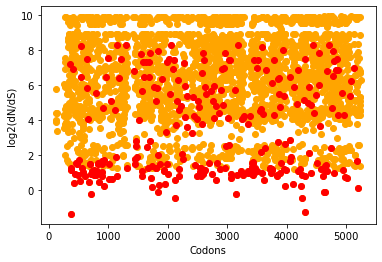

In [175]:
#this can't be right
fig, ax = plt.subplots()
ax = plt.scatter(df.iloc[:, 0], df.iloc[:, 5], c = 'orange')
plt.xlabel('Codons')
plt.ylabel('log2(dN/dS)')
significant = df.iloc[:, 4] < 0.05
df_sig = df.loc[significant, :]
plt.scatter(df_sig.iloc[:, 0], df_sig.iloc[:, 5], c = 'red')
plt.show()